In [1]:
import sys
sys.path.append('../..')

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Individual

In [2]:
grid = 5
sub_grid = 5

folder = f'./threshold_tests-{grid}_{grid}-{sub_grid}_{sub_grid}/'

In [16]:
files = os.listdir(folder)
files = [file for file in files if file.endswith('-analysis.csv')] # Filter files

# Gather thresholds
theshold_scales = np.unique(np.array([int(file.split('-')[0][-1]) for file in files]))
theshold_scales.sort()

# Gather environment ids
environment_ids = np.unique(np.array([int(file.split('-')[1][-1]) for file in files]))
environment_ids.sort()

# Building results dataframe
rows = []
for thresh_scale in theshold_scales:
    for env_i in environment_ids:
        df = pd.read_csv(folder + f't_e{thresh_scale}-env_{env_i}-analysis.csv', index_col=0)

        rows.append({
            'threshold': thresh_scale,
            'environment': env_i,
            'convergence': df['converged']['mean'],
            'convergence_std': df['converged']['standard_deviation'],
            't_min_over_t': df['steps_taken']['success_mean'],
            't_min_over_t_std': df['steps_taken']['success_standard_deviation']
        })
results_df = pd.DataFrame(rows)

In [15]:
df

,y,x,optimal_steps_count,converged,reached_horizon,steps_taken,discounted_rewards,extra_steps,t_min_over_t
mean,NaN,NaN,NaN,0.22550675675675674,0.7744932432432432,964.200169,0.057815,878.321791,0.181374
standard_deviation,NaN,NaN,NaN,0.4179156127901968,0.41791561279019684,436.729120,0.122288,433.286422,0.209545
success_mean,NaN,NaN,NaN,1.0,0.0,157.790262,0.256359,78.225968,0.553038
success_standard_deviation,NaN,NaN,NaN,0.0,0.0,78.486422,0.124244,61.338040,0.121821
run_0,0.0,110.0,67.0,False,True,1199.000000,0.000006,1132.000000,0.055880
...,...,...,...,...,...,...,...,...,...
run_3547,110.0,137.0,144.0,False,True,1199.000000,0.000006,1055.000000,0.120100
run_3548,110.0,138.0,145.0,False,True,1199.000000,0.000006,1054.000000,0.120934
run_3549,110.0,139.0,146.0,False,True,1199.000000,0.000006,1053.000000,0.121768
run_3550,110.0,140.0,147.0,False,True,1199.000000,0.000006,1052.000000,0.122602


In [17]:
results_df

,threshold,environment,convergence,convergence_std,t_min_over_t,t_min_over_t_std
0,1,0,0.7773085585585585,0.41605283720961994,783.743571,257.629717
1,1,1,0.0,0.0,NaN,NaN
2,1,2,0.9994369369369369,0.023722268505564078,329.936056,81.964480
3,1,3,0.4895833333333333,0.49989148127924277,811.200115,263.653524
4,1,4,0.20242117117117117,0.4018044806032688,674.959666,305.074528
...,...,...,...,...,...,...
75,8,5,0.009009009009009009,0.09448728361893256,409.343750,73.153665
76,8,6,0.12556306306306306,0.3313562739066281,328.744395,76.535970
77,8,7,0.010416666666666666,0.1015291077584267,389.864865,94.748545
78,8,8,0.0,0.0,NaN,NaN


In [18]:
source_positions = []
for env_i in environment_ids:
    df = pd.read_csv(folder + f't_e1-env_{env_i}.csv')
    env_source_pos = np.array([int(part) for part in df['environment'][4].split('_')])
    source_positions.append(env_source_pos)

/tmp/ipykernel_543591/1846508608.py:3: DtypeWarning: Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder + f't_e1-env_{env_i}.csv')
/tmp/ipykernel_543591/1846508608.py:3: DtypeWarning: Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder + f't_e1-env_{env_i}.csv')
/tmp/ipykernel_543591/1846508608.py:3: DtypeWarning: Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder + f't_e1-env_{env_i}.csv')
/tmp/ipykernel_543591/1846508608.py:3: DtypeWarning: Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder + f't_e1-env_{env_i}.csv')
/tmp/ipykernel_543591/1846508608.py:3: DtypeWarning: Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder + f't_e1-env_{env_i}.csv')
/tmp/ipyke

## For all

In [26]:
def get_results(grid, subgrid) -> pd.DataFrame:
    folder = f'./threshold_tests-{grid}_{grid}-{subgrid}_{subgrid}/'

    # Gather files
    files = os.listdir(folder)
    files = [file for file in files if file.endswith('-analysis.csv')] # Filter files

    # Gather thresholds
    theshold_scales = np.unique(np.array([int(file.split('-')[0][-1]) for file in files]))
    theshold_scales.sort()

    # Gather environment ids
    environment_ids = np.unique(np.array([int(file.split('-')[1][-1]) for file in files]))
    environment_ids.sort()

    # Building results dataframe
    rows = []
    for thresh_scale in theshold_scales:
        for env_i in environment_ids:
            df = pd.read_csv(folder + f't_e{thresh_scale}-env_{env_i}-analysis.csv', index_col=0)

            rows.append({
                'threshold': thresh_scale,
                'environment': env_i,
                'convergence': df['converged']['mean'],
                'convergence_std': df['converged']['standard_deviation'],
                't_min_over_t': df['steps_taken']['success_mean'],
                't_min_over_t_std': df['steps_taken']['success_standard_deviation']
            })
    results_df = pd.DataFrame(rows)

    return results_df

In [27]:
all_test_grids = np.array([
    [5,5],
    [5,7],
    [7,5],
    [7,7],
    [9,5],
    [9,7]
])

all_result_dfs = [get_results(grid, subgrid) for grid, subgrid in all_test_grids]

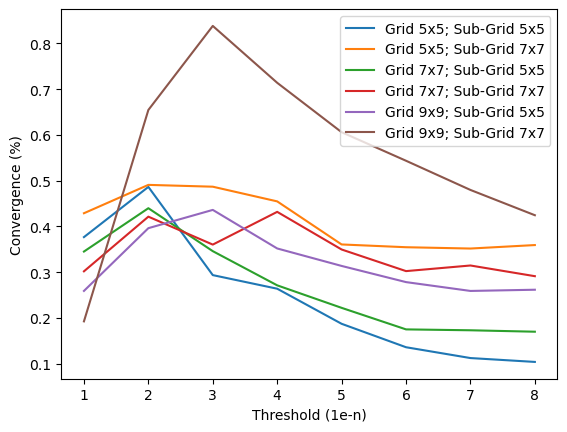

In [28]:
metric_label = 'Convergence'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].std())
    plt.errorbar(theshold_scales,
                 metric,
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}')

plt.xlabel('Threshold (1e-n)')
plt.ylabel(f'{metric_label} (%)')
plt.legend()
plt.show()

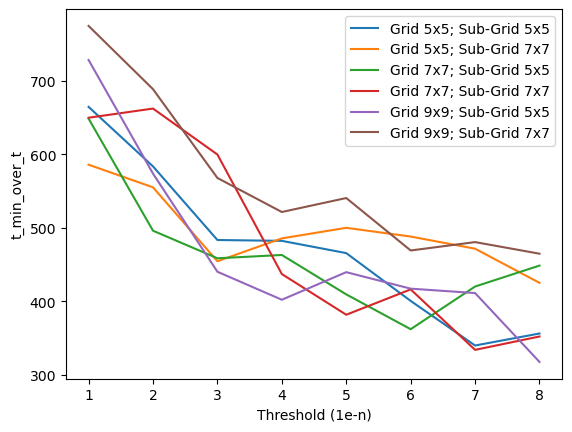

In [29]:
metric_label = 't_min_over_t'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].std())
    plt.errorbar(theshold_scales,
                 metric,
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}')

plt.xlabel('Threshold (1e-n)')
plt.ylabel(f'{metric_label}')
plt.legend()
plt.show()

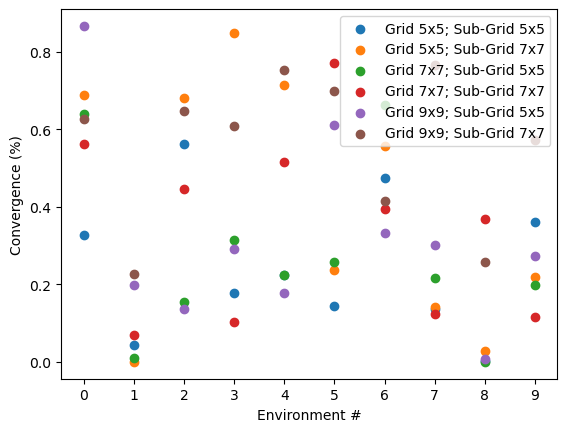

In [30]:
metric_label = 'Convergence'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    if grid
    metric = np.array(res_df.astype(float).groupby('environment')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('environment')[metric_label.lower()].std())
    plt.scatter(environment_ids,
                 metric,
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}')

plt.xlabel('Environment #')
plt.xticks(np.arange(len(environment_ids)))
plt.ylabel(f'{metric_label} (%)')
plt.legend()
plt.show()

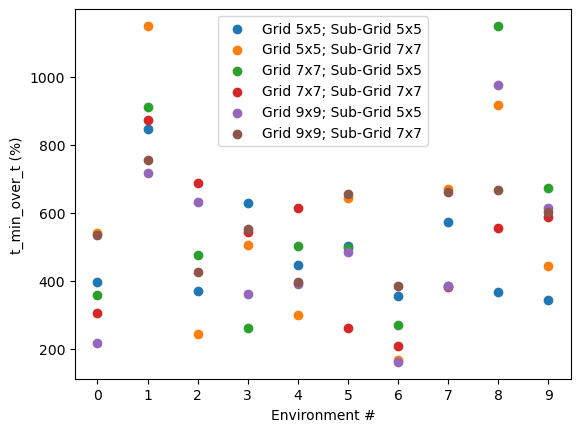

In [31]:
metric_label = 't_min_over_t'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('environment')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('environment')[metric_label.lower()].std())
    plt.scatter(environment_ids,
                 metric,
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}')

plt.xlabel('Environment #')
plt.xticks(np.arange(len(environment_ids)))
plt.ylabel(f'{metric_label} (%)')
plt.legend()
plt.show()

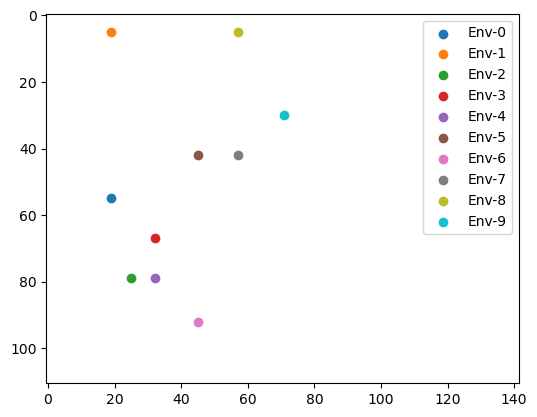

In [32]:
plt.imshow(np.zeros((111,142)), cmap='Greys')
for env_i, source_pos in zip(environment_ids, source_positions):
    plt.scatter(source_pos[1], source_pos[0], label=f'Env-{env_i}')

plt.legend()